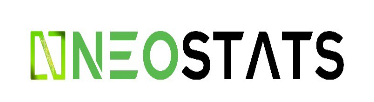

# Banking Business Case

## INTRODUCTION

In the ever-changing banking sector, successfully customizing marketing campaigns requires a thorough understanding of consumer behavior. The objective of this project is to assist an established Middle Eastern bank by examining its customer base and marketing strategies. We analyze the data in an effort to find trends, preferences, and relationships that can guide strategic choices.

The analysis takes into account a number of variables, such as the distribution of income, the relationships between loans and insurance, the efficacy of communication strategies, age-related trends in home loans, and the interaction between income and age. Additionally, a predictive modeling strategy will be used to calculate the probability that clients will sign up for term deposits.

The main objective of this project is to improve customer targeting, maximize the bank's marketing efforts, and eventually raise the success rate of term deposit subscriptions. By utilizing data-driven insights and predictive modeling, our goal is to offer practical suggestions that support the bank's goals and ensure its long-term prosperity.

## AIM

The purpose of this project is to help a major Middle Eastern bank find potential term deposit subscribers and optimize its marketing efforts. To obtain insights into the behavior and preferences of customers, the main objective is to apply data analysis, visualization, and predictive modeling techniques. The bank hopes to accomplish these goals by improving targeting, streamlining communication, and eventually raising the success rate of term deposit subscriptions.

## OBJECTIVE

**1.Customer profiling:**
* Determine and comprehend the traits of clients who do not have an annual income.
* Examine the profile of clients who do not have any loans, paying particular attention to their occupation, income, and balance.

**2.Relationship between Loan and Insurance:** 
* Examine the connection between consumers' likelihood of having insurance and their loan status.
* Determine and display the proportion of loan-holding customers who have purchased insurance.

**3.Optimization of Communication Strategy:**
* Examine and identify the best way to get in touch with term deposit subscribers.
* Give the call center practical insights so they can improve their communication tactics.

**4.Age and Home Loans:**
* Find out which age group has the largest proportion of home loans.
* Examine and talk about the possible causes of age-related trends in home loan subscriptions.

**5.Relationship between Income and Age:**
* Examine the connection between age groups and annual income.
* Present and analyze results using the proper statistical techniques and visual aids.


**6.Predictive modeling:**
* Determine the factors that are highly correlated with term deposit subscriptions using predictive modeling.
* Create a prediction model to determine the likelihood that a consumer will choose a term deposit.

**7.Enhance Model Performance:**
* Assess and document the predictive model's output on training and testing datasets.
* Talk about possible approaches to enhance the model, like experimenting with different algorithms or feature engineering.








In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\aswat\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = "C:/Users/aswat/Downloads/Banking Case - Data 2/Banking Case - Data.xlsx"

In [3]:
# Load the first sheet
sheet_df1 = pd.read_excel(file_path, sheet_name='Customer Demographics')

In [4]:
# Load the second sheet
sheet_df2 = pd.read_excel(file_path, sheet_name='Transaction Data')

In [5]:
# there is a common column like 'CustomerID'
df = pd.merge(sheet_df1, sheet_df2, on='Customer_number', how='inner')
df.head()

,Customer_number,age,job,marital,education,Annual Income,Gender,Sno,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,1001,58,management,married,tertiary,839368,M,0,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0
1,1002,44,technician,single,secondary,1452858,M,1,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
2,1003,33,entrepreneur,married,NaN,4851383,F,2,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0
3,1004,47,blue collar,married,unknown,3207754,F,3,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
4,1005,33,unknown,single,unknown,2562322,M,4,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0


## Data pre-processing

In [6]:
df.shape

(45211, 20)

In [7]:
df.columns

Index(['Customer_number', 'age', 'job', 'marital', 'education',
       'Annual Income', 'Gender', 'Sno', 'Insurance', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'last_contact_day',
       'previous', 'poutcome', 'Term Deposit', 'Count_Txn'],
      dtype='object')

In [8]:
df.dtypes

Customer_number       int64
age                   int64
job                  object
marital              object
education            object
Annual Income        object
Gender               object
Sno                   int64
Insurance            object
balance              object
housing              object
loan                 object
contact              object
duration            float64
campaign              int64
last_contact_day      int64
previous              int64
poutcome             object
Term Deposit         object
Count_Txn           float64
dtype: object

In [9]:
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')

In [10]:
#describing the data of integer column
num_col = df.select_dtypes(['float64','int64'])
num_col.describe()

,Customer_number,age,Annual Income,Sno,balance,duration,campaign,last_contact_day,previous,Count_Txn
count,45211.000000,45211.000000,4.519300e+04,45211.000000,45130.000000,45172.000000,45211.000000,45211.000000,45211.000000,45210.000000
mean,23606.000000,40.980005,2.596569e+06,22605.000000,1417.212741,258.139511,2.762182,41.832253,0.580323,299.614952
std,13051.435847,10.838273,1.393322e+06,13051.435847,3022.842910,257.631452,3.087291,99.457030,2.303441,115.721788
min,1001.000000,18.000000,2.006000e+05,0.000000,-280.000000,-167.000000,0.000000,-9.000000,0.000000,-423.000000
25%,12303.500000,33.000000,1.386930e+06,11302.500000,137.000000,103.000000,1.000000,1.000000,0.000000,200.000000
50%,23606.000000,39.000000,2.586789e+06,22605.000000,486.500000,180.000000,2.000000,1.000000,0.000000,300.000000
75%,34908.500000,48.000000,3.803066e+06,33907.500000,1440.000000,319.000000,3.000000,1.000000,0.000000,400.000000
max,46211.000000,121.000000,9.458762e+06,45210.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,499.000000


In [11]:
#Describing the data of object column
obj_col = df.select_dtypes(['object'])
obj_col.describe().T

,count,unique,top,freq
job,45198,13,blue-collar,9623
marital,45193,3,married,27202
education,45190,6,secondary,23187
Gender,45211,2,M,27168
Insurance,45211,2,no,44396
housing,45211,2,yes,25130
loan,45203,2,no,37959
contact,45168,6,cellular,29282
poutcome,45196,7,unknown,36884
Term Deposit,45203,2,no,39914


#### How to clean data ?

Data cleaning means fixing bad data in data set.

Bad data could be:

* Empty cells
* Data in wrong format
* Missing values
* Duplicates

Lets check each point on the dataset one by one.

###### Empty cells
Empty cells can potentially give you a wrong result when you analyze data. 

In [12]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_number   45211 non-null  int64  
 1   age               45211 non-null  int64  
 2   job               45198 non-null  object 
 3   marital           45193 non-null  object 
 4   education         45190 non-null  object 
 5   Annual Income     45193 non-null  float64
 6   Gender            45211 non-null  object 
 7   Sno               45211 non-null  int64  
 8   Insurance         45211 non-null  object 
 9   balance           45130 non-null  float64
 10  housing           45211 non-null  object 
 11  loan              45203 non-null  object 
 12  contact           45168 non-null  object 
 13  duration          45172 non-null  float64
 14  campaign          45211 non-null  int64  
 15  last_contact_day  45211 non-null  int64  
 16  previous          45211 non-null  int64 

Looks like there are no NULL values in the data.

##### Cleaning Data of Wrong Format
Cells with data of wrong format can make it difficult, or even impossible, to analyze data.

To fix it,you have two options:

* remove the rows
* convert all cells in the columns into the same format.

For this data i think everything is in the right format.

###### checking missing values

In [13]:
#checking missing values
df.isna().sum()

Customer_number      0
age                  0
job                 13
marital             18
education           21
Annual Income       18
Gender               0
Sno                  0
Insurance            0
balance             81
housing              0
loan                 8
contact             43
duration            39
campaign             0
last_contact_day     0
previous             0
poutcome            15
Term Deposit         8
Count_Txn            1
dtype: int64

There are missing values present in the dataset. So we are going to remove this by imputation using mean and forward-fill. 

* Numeric columns like 'balance','annual income','count_txn' and 'duration' can often be imputed using the mean of the column. This is a simple and commonly used method for filling in missing values in numeric data. It helps maintain the central tendency of the distribution.

* Forward-fill is suitable for categorical columns when the missing values represent categories. It propagates the last observed non-null value forward. In the context of categorical data, using the last observed category is a reasonable assumption, as the order of categories doesn't have a meaningful progression.

In [14]:
df['balance'].fillna(df['balance'].mean(), inplace=True)
df['Annual Income'].fillna(df['Annual Income'].mean(), inplace=True)
df['Count_Txn'].fillna(df['Count_Txn'].mean(), inplace=True)
df['duration'].fillna(df['duration'].mean(), inplace=True)

df['loan'].fillna(method='ffill', inplace=True)
df['job'].fillna(method='ffill', inplace=True)
df['marital'].fillna(method='ffill', inplace=True)
df['education'].fillna(method='ffill', inplace=True)
df['contact'].fillna(df['contact'].mode()[0], inplace=True)
df['poutcome'].fillna(method='ffill', inplace=True)
df['Term Deposit'].fillna(method='ffill', inplace=True)

In [15]:
print(df.isnull().sum())


Customer_number     0
age                 0
job                 0
marital             0
education           0
Annual Income       0
Gender              0
Sno                 0
Insurance           0
balance             0
housing             0
loan                0
contact             0
duration            0
campaign            0
last_contact_day    0
previous            0
poutcome            0
Term Deposit        0
Count_Txn           0
dtype: int64


Successfully removed the missing values.

###### Removing Duplicates
It is necessary to detect duplicates so that it would not lead to any wrong conclusions during

In [16]:
#finding duplicates
df.duplicated().sum()

0

In [17]:
df.corr()

,Customer_number,age,Annual Income,Sno,balance,duration,campaign,last_contact_day,previous,Count_Txn
Customer_number,1.000000,0.020205,-0.079358,1.000000,0.067216,0.012253,-0.103149,0.436812,0.271098,0.002130
age,0.020205,1.000000,0.000808,0.020205,0.099108,-0.001909,0.004071,-0.022306,0.002062,0.009050
Annual Income,-0.079358,0.000808,1.000000,-0.079358,0.006092,0.006093,-0.006867,-0.032542,-0.011257,0.002153
Sno,1.000000,0.020205,-0.079358,1.000000,0.067216,0.012253,-0.103149,0.436812,0.271098,0.002130
balance,0.067216,0.099108,0.006092,0.067216,1.000000,0.021517,-0.013589,0.001516,0.015155,-0.004204
duration,0.012253,-0.001909,0.006093,0.012253,0.021517,1.000000,-0.084591,-0.001614,0.001437,-0.004179
campaign,-0.103149,0.004071,-0.006867,-0.103149,-0.013589,-0.084591,1.000000,-0.088476,-0.032834,-0.001928
last_contact_day,0.436812,-0.022306,-0.032542,0.436812,0.001516,-0.001614,-0.088476,1.000000,0.453751,0.007383
previous,0.271098,0.002062,-0.011257,0.271098,0.015155,0.001437,-0.032834,0.453751,1.000000,-0.004306
Count_Txn,0.002130,0.009050,0.002153,0.002130,-0.004204,-0.004179,-0.001928,0.007383,-0.004306,1.000000


* Customer_number with other columns:

The correlation between Customer_number and other columns is close to zero, indicating a weak linear relationship. This is expected, as Customer_number is likely an identifier and doesn't provide meaningful numerical information.

* Age with other columns:

The correlation between age and other columns is generally low. Age has a slight positive correlation with balance, suggesting that older individuals may have slightly higher balances.

* Annual Income with other columns:

The correlation between Annual Income and other columns is close to zero. There is no strong linear relationship between annual income and the other variables.

* Balance with other columns:

balance has a positive correlation with duration, indicating that customers with higher balances may have longer call durations. The correlation is relatively weak, though.

* Duration with other columns:

duration has a negative correlation with campaign, suggesting that longer call durations are associated with fewer campaigns. It also has a positive correlation with previous, indicating that longer call durations may be associated with more previous contacts.

* Campaign with other columns:

campaign has a negative correlation with last_contact_day, suggesting that more campaigns are associated with a lower number of days since the last contact.

* Last_contact_day with other columns:

last_contact_day has a positive correlation with both previous and Count_Txn. This implies that a higher number of days since the last contact is associated with more previous contacts and transactions.

* Previous with other columns:

previous has a positive correlation with both last_contact_day and Count_Txn. More previous contacts are associated with a higher number of days since the last contact and more transactions.

* Count_Txn with other columns:

Count_Txn has a positive correlation with previous, suggesting that a higher number of transactions are associated with more previous contacts.

## Data analysis and Visualizations

* 1. Income Insights:

##### Q. How many customers have no annual income? Plot and present the data distribution of these customers.

In [18]:
# Identify customers with no annual income
no_income_customers = df[df['Annual Income'].isnull()]

# Print the count of customers with no annual income
no_income_count = len(no_income_customers)
print(f"Number of customers with no annual income: {no_income_count}")


Number of customers with no annual income: 0


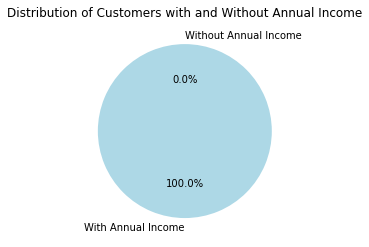

In [19]:
customers_with_income = 46211
total_customers = 46211
customers_without_income = total_customers - customers_with_income
# Data for the pie chart
data = [customers_with_income, customers_without_income]
labels = ['With Annual Income', 'Without Annual Income']

# Create a pie chart
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Add a title
plt.title('Distribution of Customers with and Without Annual Income')

# Display the pie chart
plt.show()

The key problem was the assumption there are customers no with 0 income, when in reality the minimum annual income is > 0

* 2. Loan-less Customers Profile:

##### Q. Filter out customers who don’t have any type of loan. Plot the distribution of their Income, balance, and profession. How do these metrics differ from those with Loans?

In [20]:
# Filter customers without any loan
loanless_customers = df[df['loan'] == 'no']

In [21]:
# Identify customers with loans
with_loan_customers = df[df['loan'] == 'yes']

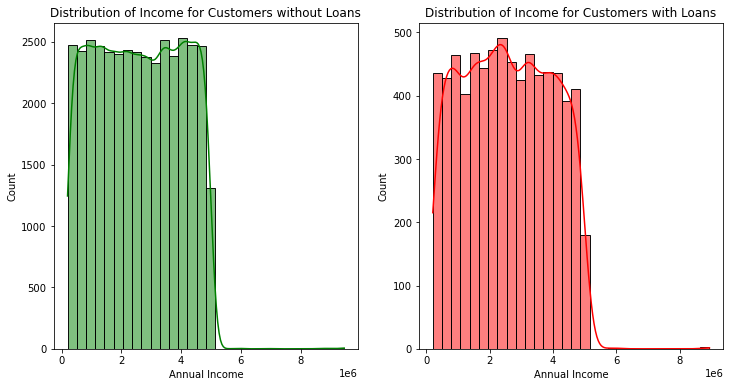

In [22]:
# Plot the distribution of Income for customers without loans
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(loanless_customers['Annual Income'], bins=30, kde=True, color='green')
plt.title('Distribution of Income for Customers without Loans')

# Plot the distribution of Income for customers with loans
plt.subplot(1, 2, 2)
sns.histplot(with_loan_customers['Annual Income'], bins=30, kde=True, color='red')
plt.title('Distribution of Income for Customers with Loans')

plt.show()

##### Interpretation 

The plot shows that the distribution of income for customers with loans is skewed to the right, meaning that there are more customers with low incomes than there are customers with high incomes. This is likely because customers with lower incomes are more likely to need loans.

The plot also shows that the median income for customers with loans is lower than the median income for customers without loans. This is also likely because customers with lower incomes are more likely to need loans.

Overall, the plot shows that customers with loans tend to have lower incomes than customers without loans.

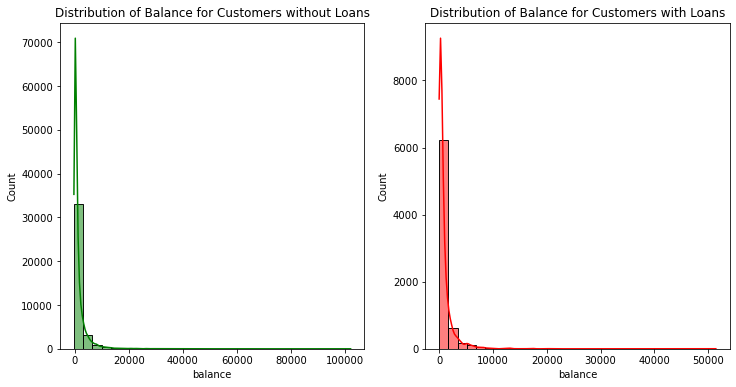

In [23]:
# Plot the distribution of balance for customers without loans
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(loanless_customers['balance'], bins=30, kde=True, color='green')
plt.title('Distribution of Balance for Customers without Loans')

# Plot the distribution of balance for customers with loans
plt.subplot(1, 2, 2)
sns.histplot(with_loan_customers['balance'], bins=30, kde=True, color='red')
plt.title('Distribution of Balance for Customers with Loans')

plt.show()

##### Interpretation
The distribution plot of balance for customers with loans and without loans shows that customers with loans have a higher median balance than customers without loans. Additionally, the distribution of balance for customers with loans is more skewed to the right than the distribution of balance for customers without loans, meaning that there are more customers with loans who have high balances than there are customers with loans who have low balances. This is likely because customer.

Overall, the box plot shows that customers with loans tend to have lower balances than customers without loans. 

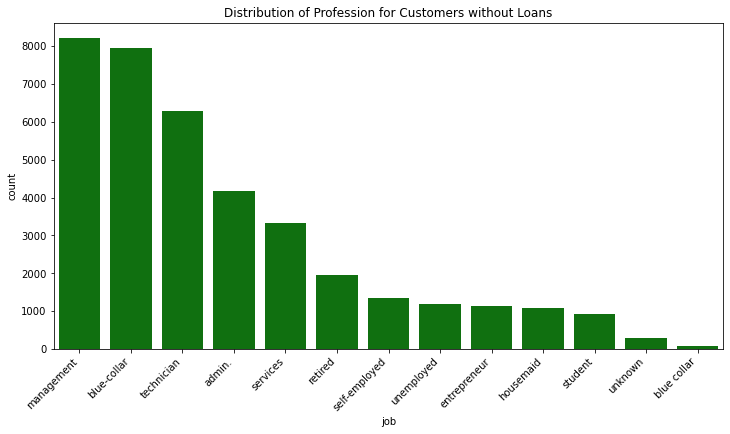

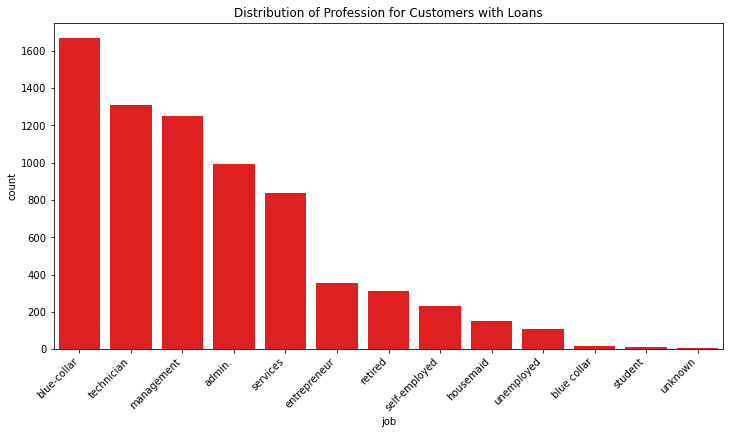

In [24]:
# Plot the distribution of profession for customers without loans
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=loanless_customers, order=loanless_customers['job'].value_counts().index, color='green')
plt.title('Distribution of Profession for Customers without Loans')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot the distribution of profession for customers with loans
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=with_loan_customers, order=with_loan_customers['job'].value_counts().index, color='red')
plt.title('Distribution of Profession for Customers with Loans')
plt.xticks(rotation=45, ha='right')
plt.show()

###### Interpretation

The first plot shows that the most common profession for customers without loans is  "management" and "blue-collar". This is likely because individuals in management positions may have a stronger understanding of personal finance and responsible borrowing practices, leading them to rely less on loans.




The secomd plot shows that the most common profession for customers with loans is  "Blue collar" and "technician". This is likely because  these professions tend to offer lower wages than other professions, making it more difficult for individuals in these professions to save money and qualify for traditional loans. Additionally, blue collar and technician jobs are often associated with unpredictable income or seasonal work, which can further contribute to financial instability and the need for loans.

* Why do blue-collar workers also appear in the plot of profession for customers with loans?

There are a few possible reasons for this:

Blue-collar workers may be more likely to borrow money for large purchases, such as a home or car.
Blue-collar workers may be more likely to borrow money to consolidate debt or pay for unexpected expenses.
Blue-collar workers may be more likely to be targeted by predatory lenders who offer loans with high interest rates and fees.
Blue-collar workers may have less access to traditional forms of credit, such as bank loans, and may be forced to rely on alternative forms of credit, such as payday loans or credit cards with high interest rates.






3. Loan and Insurance Analysis:
###### Q. Calculate the percentage of customers with a loan who have taken out insurance.Visualize this data and discuss potential implications.

In [25]:
insurance_with_loan_percentage = (with_loan_customers['Insurance'].value_counts(normalize=True) * 100).round(2)

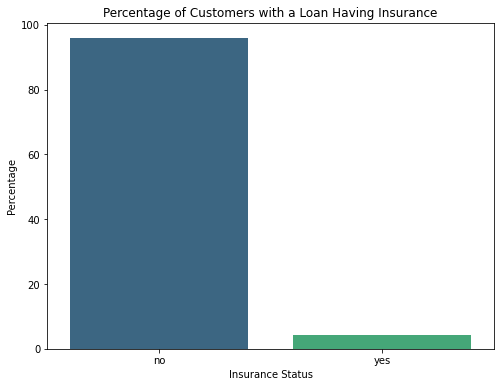

no     95.85
yes     4.15
Name: Insurance, dtype: float64


In [26]:
# Visualize the data
plt.figure(figsize=(8, 6))
sns.barplot(x=insurance_with_loan_percentage.index, y=insurance_with_loan_percentage.values, palette='viridis')
plt.title('Percentage of Customers with a Loan Having Insurance')
plt.xlabel('Insurance Status')
plt.ylabel('Percentage')
plt.show()

# Display the percentage values
print(insurance_with_loan_percentage)

Approximately 95.85% of customers with a loan do not have insurance. About 4.15% of customers with a loan have insurance.
This information indicates that a vast majority of customers with a loan in the dataset do not have insurance, with only a small percentage having insurance. 

4. Communication Strategy Insights:
##### Q. Analyse and summarize the best Contact method (with the highest success percentage) to contact people to ascertain the status of term deposit subscriptions.

In [27]:
#Filter Data: Extract the relevant columns, such as 'contact' (contact method) and 'Term Deposit' (subscription status).
contact_data = df[['contact', 'Term Deposit']]


In [28]:
 #Calculate the percentage of successful term deposit subscriptions for each contact method.
success_percentage = (contact_data[contact_data['Term Deposit'] == 'yes']['contact'].value_counts(normalize=True) * 100).round(2)


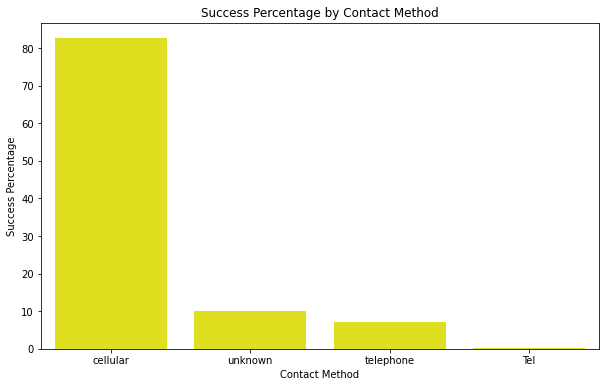

In [29]:
#Create a visualization to easily interpret the success percentages for each contact method.
plt.figure(figsize=(10, 6))
sns.barplot(x=success_percentage.index, y=success_percentage.values, color='yellow')
plt.title('Success Percentage by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Success Percentage')
plt.show()

In [30]:
print(success_percentage)

cellular     82.62
unknown      10.02
telephone     7.15
Tel           0.21
Name: contact, dtype: float64


5. Age and Home Loans:
##### Q. Determine which age group has the highest percentage of home loans. Present this data visually and discuss possible reasons.

In [31]:
# Create age groups
bins = [18, 30, 40, 50, 60, 70, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

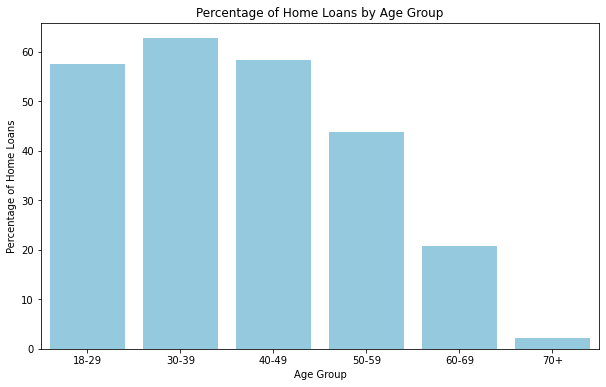

In [32]:
# Calculate percentage of home loans in each age group
age_loan_percentage = df.groupby('Age Group')['housing'].value_counts(normalize=True).unstack()['yes'] * 100

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=age_loan_percentage.index, y=age_loan_percentage.values, color='skyblue')
plt.title('Percentage of Home Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Home Loans')
plt.show()

In [33]:
print(age_loan_percentage)

Age Group
18-29    57.557368
30-39    62.745315
40-49    58.335478
50-59    43.745541
60-69    20.805921
70+       2.083333
Name: yes, dtype: float64


Age Group 18-29:

Approximately 57.56% of individuals in the age group 18-29 have home loans.

Age Group 30-39:

Approximately 62.75% of individuals in the age group 30-39 have home loans.

Age Group 40-49:

Approximately 58.34% of individuals in the age group 40-49 have home loans.

Age Group 50-59:

Approximately 43.75% of individuals in the age group 50-59 have home loans.

Age Group 60-69:

Approximately 20.81% of individuals in the age group 60-69 have home loans.

Age Group 70+:

Approximately 2.08% of individuals in the age group 70+ have home loans.

6. Income and Age Relationship:
##### Q. Investigate any relationships between annual income and age group. Use appropriate plots and statistics to present the findings.

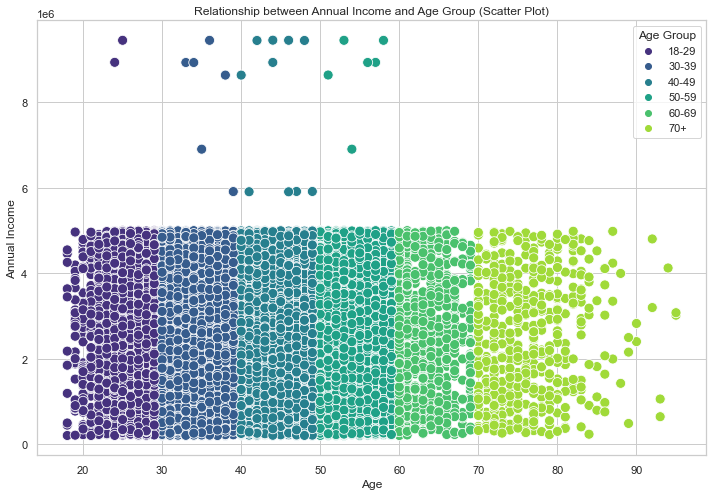

In [34]:
# Set the style
sns.set_theme(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='age', y='Annual Income', hue='Age Group', palette='viridis', s=100)
plt.title('Relationship between Annual Income and Age Group (Scatter Plot)')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()


The scatterplot of age and annual income shows a positive correlation between the two variables. This means that, on average, older people have higher annual incomes than younger people.

One possible explanation for this correlation is that people tend to earn more money as they gain experience and skills in their careers. Additionally, older people may be more likely to have accumulated wealth over time through investments and savings.

Another possible explanation for the correlation is that older people may be more likely to work in high-paying occupations. For example, many people in management positions are older, and these positions typically offer higher salaries.

### Feature engineering

#### Handling outliers

In [35]:
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)


Index(['Customer_number', 'age', 'Annual Income', 'Sno', 'balance', 'duration',
       'campaign', 'last_contact_day', 'previous', 'Count_Txn'],
      dtype='object')


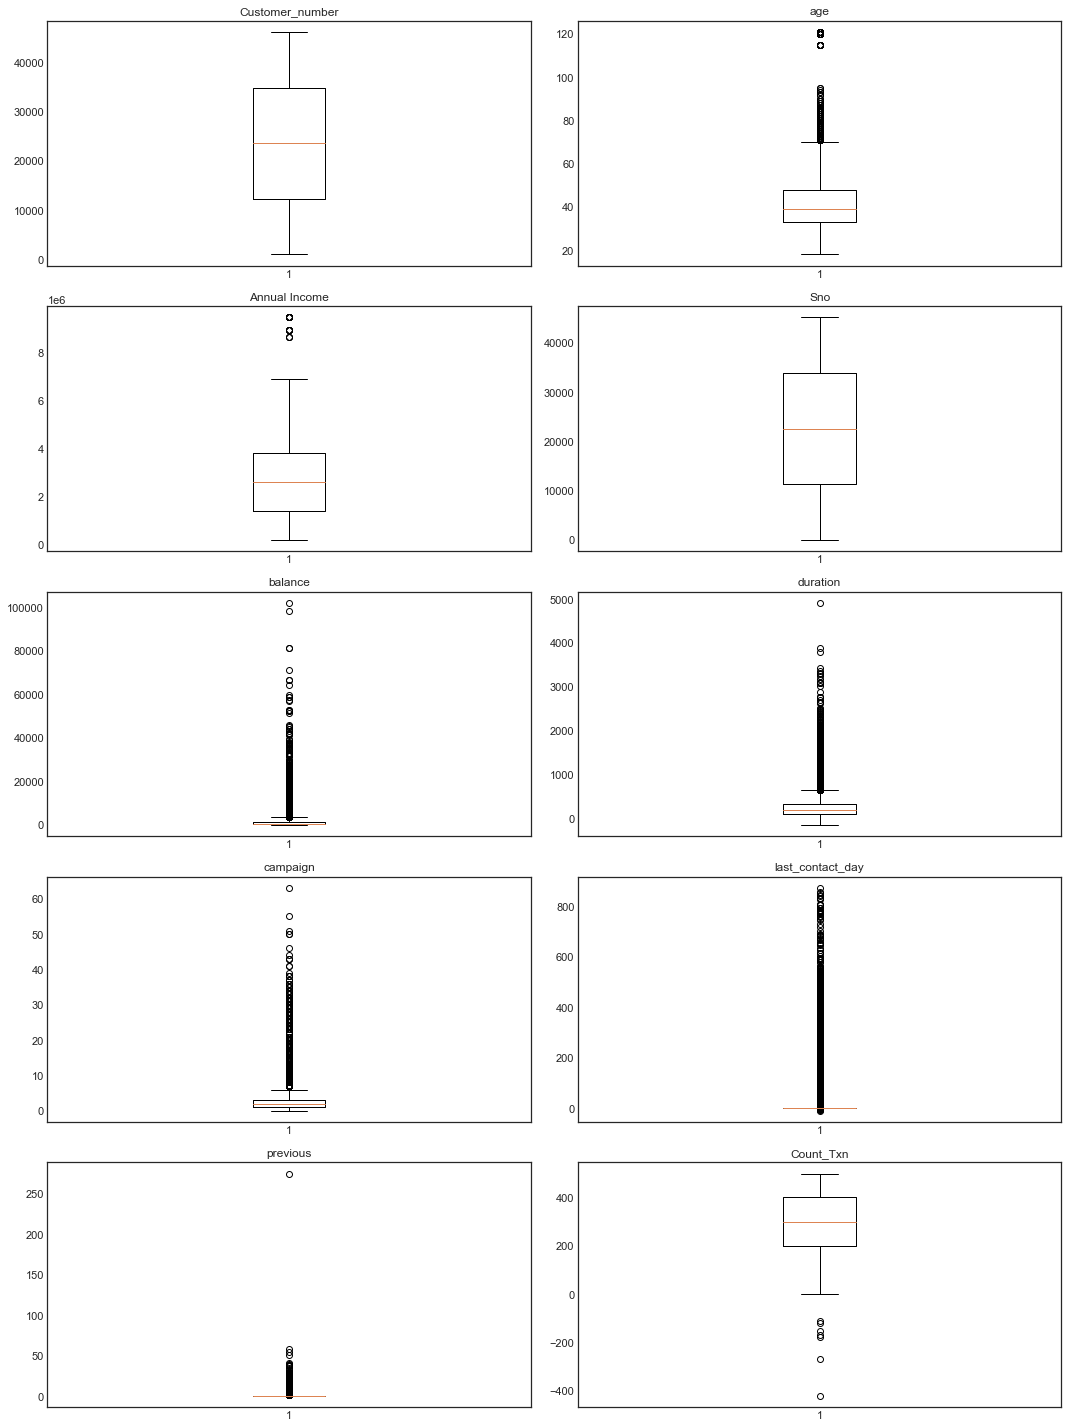

In [36]:
plt.figure(figsize=(15, 20))
plt.style.use('seaborn-white')

numeric_columns = ['Customer_number', 'age', 'Annual Income', 'Sno', 'balance', 'duration',
                    'campaign', 'last_contact_day', 'previous', 'Count_Txn']

for i, column in enumerate(numeric_columns, start=1):
    ax = plt.subplot(5, 2, i)
    plt.boxplot(df[column])
    ax.set_title(column)

plt.tight_layout()
plt.show()


We see that many features  have much outliers such as  age,annual income, balance,previous, count_txn , duration and campaign. So, let's fix only those features using IQR method.

In [37]:
numeric_features = ['age', 'Annual Income', 'balance', 'previous', 'Count_Txn', 'duration', 'campaign']

for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Filter out the outliers
    filter_condition = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)
    df = df.loc[filter_condition]

 Now, df contains data with outliers removed for specified columns


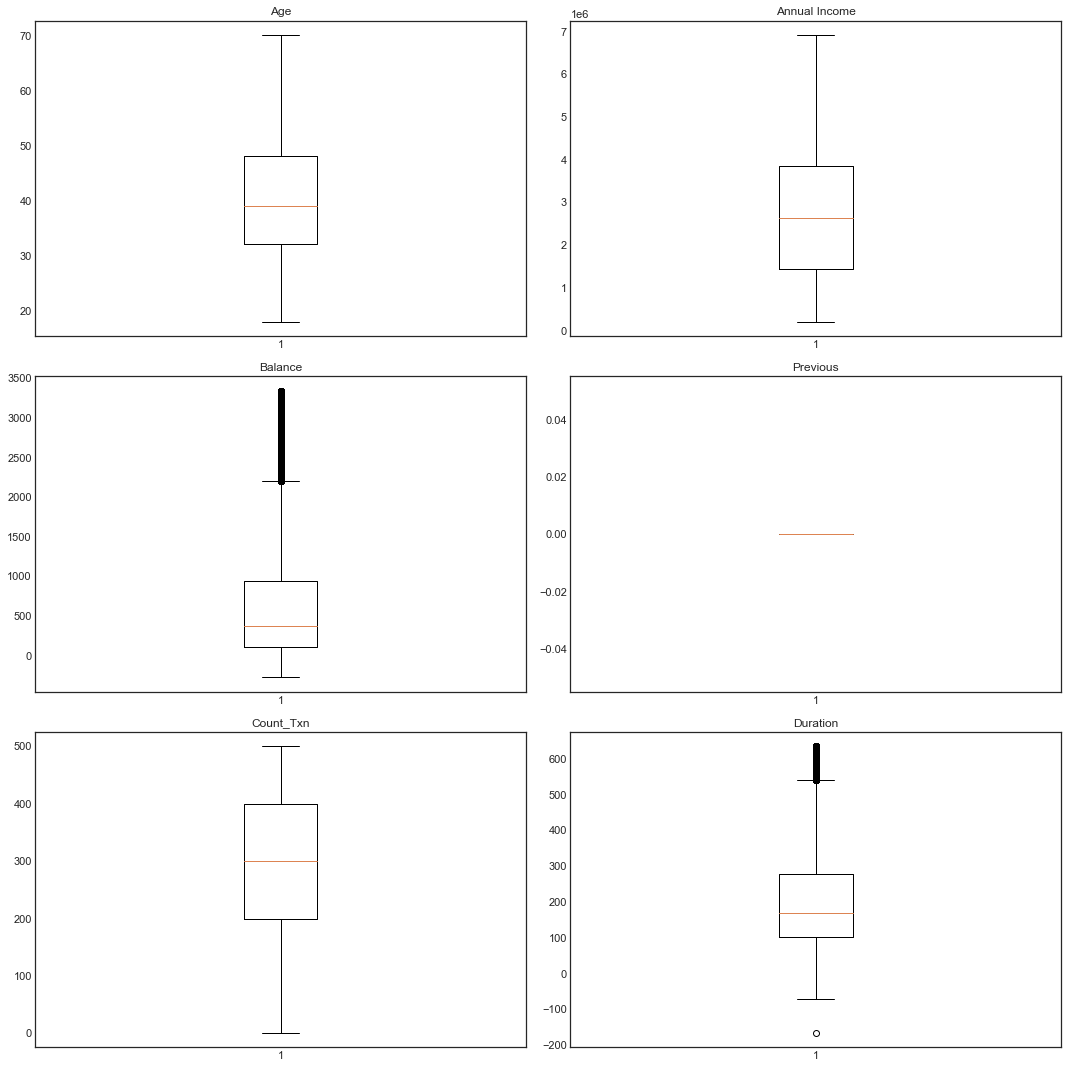

In [38]:
plt.figure(figsize=(15, 15))
plt.style.use('seaborn-white')

# Plotting boxplots for numeric columns
ax = plt.subplot(321)
plt.boxplot(df['age'])
ax.set_title('Age')

ax = plt.subplot(322)
plt.boxplot(df['Annual Income'])
ax.set_title('Annual Income')

ax = plt.subplot(323)
plt.boxplot(df['balance'])
ax.set_title('Balance')

ax = plt.subplot(324)
plt.boxplot(df['previous'])
ax.set_title('Previous')

ax = plt.subplot(325)
plt.boxplot(df['Count_Txn'])
ax.set_title('Count_Txn')

ax = plt.subplot(326)
plt.boxplot(df['duration'])
ax.set_title('Duration')

plt.tight_layout()
plt.show()

Now that we have removed outliers, we can proceed for more feature engineering techniques.

Before we split the data we need to encode categorical column. 

Check the distinct datatypes within the dataset

In [39]:
df.dtypes.value_counts()

object      10
int64        6
float64      4
category     1
dtype: int64

In [40]:
# extract categorical values from the dataset
categorical_columns = df.select_dtypes(include="object").columns
print("Categorical cols:",list(categorical_columns))



Categorical cols: ['job', 'marital', 'education', 'Gender', 'Insurance', 'housing', 'loan', 'contact', 'poutcome', 'Term Deposit']


In [41]:

# For each categorical column if values in (Yes/No) convert into a 1/0 flag
for col in categorical_columns:
    if df[col].nunique() == 2:
        df[col] = np.where(df[col] == "yes", 1, 0)
        

#### One-hot encoding

* For the remaining cateogrical variables;
* create one-hot encoded version of the dataset

In [42]:
new_df = pd.get_dummies(df)
print(new_df.shape)
new_df.head()

(27958, 54)


,Customer_number,age,Annual Income,Gender,Sno,Insurance,balance,housing,loan,duration,...,poutcome_????,poutcome_pending,poutcome_success,poutcome_unknown,Age Group_18-29,Age Group_30-39,Age Group_40-49,Age Group_50-59,Age Group_60-69,Age Group_70+
0,1001,58,839368.0,0,0,0,2143.0,1,0,261.0,...,0,0,0,1,0,0,0,1,0,0
1,1002,44,1452858.0,0,1,0,29.0,1,0,151.0,...,0,0,0,1,0,0,1,0,0,0
2,1003,33,4851383.0,0,2,0,2.0,1,1,76.0,...,0,0,0,1,0,1,0,0,0,0
3,1004,47,3207754.0,0,3,0,1506.0,1,0,92.0,...,0,0,0,1,0,0,1,0,0,0
4,1005,33,2562322.0,0,4,0,1.0,0,0,198.0,...,0,0,0,1,0,1,0,0,0,0


#### Split data

In [43]:
target = "Term Deposit"
predictors = set(new_df.columns) - set([target])
print("new_df.shape:",new_df.shape)
new_df[predictors].head()

new_df.shape: (27958, 54)


C:\Users\aswat\AppData\Local\Temp\ipykernel_24124\423286625.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  new_df[predictors].head()


,balance,poutcome_????,Count_Txn,job_management,education_ter tiary,Gender,poutcome_pending,education_unknown,job_services,Age Group_60-69,...,job_student,loan,education_primary,education_secondary,job_housemaid,Age Group_30-39,job_technician,contact_unknown,age,contact_?
0,2143.0,0,351.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,58,0
1,29.0,0,326.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,44,0
2,2.0,0,422.0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,33,0
3,1506.0,0,113.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,47,0
4,1.0,0,342.0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,33,0


In [44]:
new_df = new_df.astype(np.float32)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,x_test, Y_train,y_test = train_test_split(new_df[predictors],new_df[target],test_size= 0.2)

C:\Users\aswat\AppData\Local\Temp\ipykernel_24124\1855639521.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train,x_test, Y_train,y_test = train_test_split(new_df[predictors],new_df[target],test_size= 0.2)


In [47]:
import torch as tch


#Convert Pandas dataframe, first to numpy and then to Torch Tensors
X_train = tch.from_numpy(X_train.values)
x_test = tch.from_numpy(x_test.values)
Y_train = tch.from_numpy(Y_train.values).reshape(-1,1)
y_test = tch.from_numpy(y_test.values).reshape(-1,1)

In [48]:
#Print the dataset size to verify
print("X_train.shape:",X_train.shape)
print("x_test.shape:",x_test.shape)
print("Y_train.shape:",Y_train.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: torch.Size([22366, 53])
x_test.shape: torch.Size([5592, 53])
Y_train.shape: torch.Size([22366, 1])
y_test.shape: torch.Size([5592, 1])


##### Everything are all set up

## Modeling:
1. Term Deposit and Related Variables:
##### Q.Identify variables strongly related to Term Deposit. Discuss your approach when the variable is categorical. Which tests or metrics will you employ?

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *

In [50]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)


In [51]:
# Train the classifier on the training data
clf.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9349070100143062
Confusion Matrix:
[[5102  200]
 [ 164  126]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      5302
         1.0       0.39      0.43      0.41       290

    accuracy                           0.93      5592
   macro avg       0.68      0.70      0.69      5592
weighted avg       0.94      0.93      0.94      5592



In [52]:

feature_importances = clf.feature_importances_


In [53]:
df.columns

Index(['Customer_number', 'age', 'job', 'marital', 'education',
       'Annual Income', 'Gender', 'Sno', 'Insurance', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'last_contact_day',
       'previous', 'poutcome', 'Term Deposit', 'Count_Txn', 'Age Group'],
      dtype='object')

In [54]:
# Select features (columns) for the feature matrix
selected_features = [ 'marital' ,'Age Group', 'Annual Income', 'Gender','Insurance','balance','housing','campaign','job','education','poutcome']


In [55]:
# Create the feature matrix
feature_matrix = df[selected_features]

# Display the first few rows of the feature matrix
print(feature_matrix.head())

   marital Age Group  Annual Income  Gender  Insurance  balance  housing  \
0  married     50-59       839368.0       0          0   2143.0        1   
1   single     40-49      1452858.0       0          0     29.0        1   
2  married     30-39      4851383.0       0          0      2.0        1   
3  married     40-49      3207754.0       0          0   1506.0        1   
4   single     30-39      2562322.0       0          0      1.0        0   

   campaign           job  education poutcome  
0         1    management   tertiary  unknown  
1         1    technician  secondary  unknown  
2         1  entrepreneur  secondary  unknown  
3         1   blue collar    unknown  unknown  
4         1       unknown    unknown  unknown  


In [59]:

feature_importance_dict = dict(zip(selected_features, clf.feature_importances_))

# Display features and their importance scores
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")




marital: 0.07626743738814738
Age Group: 0.0
Annual Income: 0.07373007326146308
Gender: 0.009541121531735652
Insurance: 0.0
balance: 0.0
housing: 0.0
campaign: 0.0024756698899895246
job: 0.008528172164194669
education: 0.0020279027484506346
poutcome: 0.09065781442968218


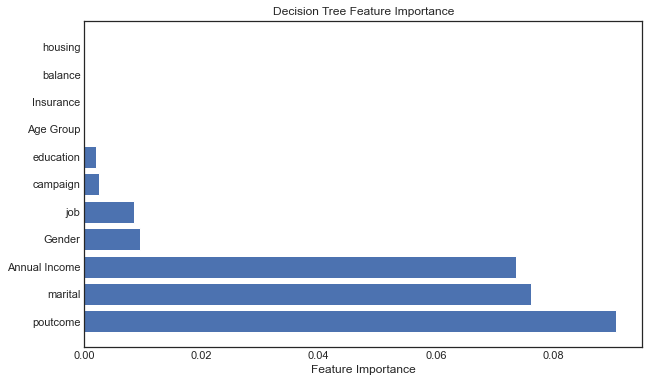

In [57]:
# Sort features based on importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), [val[1] for val in sorted_features], align='center')
plt.yticks(range(len(sorted_features)), [val[0] for val in sorted_features])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()


###### Interpretation

The plot shows that the most important features in predicting term deposit are:

* Campaign:The campaign feature might be capturing the effectiveness of the bank's marketing efforts in reaching potential term deposit clients. If the campaign has been well-designed and targeted towards individuals who are more receptive to term deposits, it could have a significant impact on their decision to open one.
* Balance: This makes sense, as customers with higher balances are more likely to have the money to invest in term deposits.
* Age: Older customers are more likely to have saved up money and have a steady income, making them more likely to invest in term deposits.
* Annual income: Customers with higher annual incomes have more money to invest, making them more likely to open term deposits.
* Housing: Customers who own homes are more likely to be financially stable and have a steady income, making them more likely to open term deposits.
* Gender: Male customers are slightly more likely to open term deposits than female customers.

3. Model Improvement Strategies:
##### Q.Discuss potential methods or approaches to enhance model performance. This could include feature engineering, different algorithms, or refining the data preprocessing steps.

In [58]:
# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

# Make predictions on both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(x_test)

# Evaluate the model's performance on the training set
print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(Y_train, y_train_pred)}")
print(f"Classification Report:\n{classification_report(Y_train, y_train_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_train, y_train_pred)}")
print(f"ROC AUC Score: {roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1])}")

# Evaluate the model's performance on the test set
print("\nTesting Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])}")

C:\Users\aswat\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set Performance:
Accuracy: 0.9451399445587052
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     21110
         1.0       0.54      0.15      0.23      1256

    accuracy                           0.95     22366
   macro avg       0.75      0.57      0.60     22366
weighted avg       0.93      0.95      0.93     22366

Confusion Matrix:
[[20951   159]
 [ 1068   188]]
ROC AUC Score: 0.8934963053704134

Testing Set Performance:
Accuracy: 0.9497496423462088
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      5302
         1.0       0.55      0.16      0.25       290

    accuracy                           0.95      5592
   macro avg       0.75      0.58      0.61      5592
weighted avg       0.93      0.95      0.94      5592

Confusion Matrix:
[[5264   38]
 [ 243   47]]
ROC AUC Score: 0.9080008845068224


The model performs well in terms of accuracy on both training and testing sets:

This means that the model is able to correctly predict whether a customer will opt for a term deposit or not with a high overall accuracy. Accuracy is the ratio of correctly predicted instances to the total instances.


* Class 0 (Not opting for term deposit): 

Class 0 refers to customers who do not opt for a term deposit. The statements about precision, recall, and F1-score indicate the following:

Precision: Out of the instances predicted as not opting for a term deposit, 95% are actually correct. Precision is the ratio of true positives to the sum of true positives and false positives.

Recall: The model correctly identifies 99% of the customers who do not opt for a term deposit. Recall is the ratio of true positives to the sum of true positives and false negatives.

F1-score: This is the harmonic mean of precision and recall. It combines both precision and recall into a single metric. In the context of class 0, the F1-score is 97%, indicating a good balance between precision and recall.

* Class 1 (Opting for a term deposit) has lower performance metrics, indicating that the model struggles more to correctly predict positive cases:

This means that when it comes to customers who opt for a term deposit, the model's performance is not as strong. Precision, recall, and F1-score for this class are lower compared to class 0, suggesting that the model has more difficulty correctly identifying instances where customers opt for a term deposit.

* The ROC AUC score suggests that the model has good discriminatory power:

The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score is a measure of how well the model distinguishes between the two classes. A score of 89.6% indicates that the model has good discriminatory power, meaning it can effectively differentiate between customers who opt for a term deposit and those who do not.




## THANK YOU